In [220]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
device = "cuda" if torch.cuda.is_available() else "cpu"
from torchvision import datasets
from torch.optim import SGD
from timeit import default_timer as timer
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
from pretty_confusion_matrix import pp_matrix
from pretty_confusion_matrix import pp_matrix_from_data

from PIL import Image as im
from IPython.display import Image, display
import os

Download and load the training data

In [206]:
train_set = datasets.MNIST('data/', download=True, train=True)
train_images = train_set.data
train_targets = train_set.targets

In [207]:
test_set = datasets.MNIST('data/', download=True, train=False)
test_images = test_set.data
test_targets = test_set.targets

In [208]:
class MNISTDataset(Dataset):
    def __init__(self, x, y):
        x = x.float()/255
        x = x.view(-1,28*28)
        self.x, self.y = x, y
    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix]
        return x.to(device), y.to(device)
    def __len__(self):
        return len(self.x)

In [209]:
def data_to_image(data_element,index,true):
    array = data_element.numpy()
    array = array * 255

    array = np.reshape(array, (28, 28))
    im_data = im.fromarray(array)
    im_data.convert('RGB').save(f'failed/{index}_number{true}.png', "PNG", optimize=True)
    display(Image(filename=f'failed/{index}_number{true}.png'))

In [210]:
def get_data():
    train = MNISTDataset(train_images, train_targets)
    train_dl = DataLoader(train, batch_size=32, shuffle=True)
    test = MNISTDataset(test_images, test_targets)
    test_dl = DataLoader(test, batch_size=len(test_images), shuffle=True)
    # test_dl = DataLoader(test, batch_size=10, shuffle=True)
    return train_dl, test_dl

In [211]:
def get_model():
    model = nn.Sequential(
        nn.Linear(28 * 28, 70),
        nn.Sigmoid(),
        nn.Linear(70, 35),
        nn.Sigmoid(),
        nn.Linear(35, 15),
        nn.Sigmoid(),
        nn.Linear(15, 10)
    ).to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = SGD(model.parameters(), lr=15e-2)
    return model, loss_fn, optimizer

In [212]:
def train_batch(x, y, model, opt, loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

In [213]:
@torch.no_grad()
def accuracy(x, y, model):
    with torch.no_grad():
        prediction = model(x)
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()

In [214]:
@torch.no_grad()
def loss(x, y, model):
    prediction = model(x)
    loss = loss_fn(prediction, y)
    return loss.item()

In [215]:
train_dl, test_dl = get_data()
model, loss_fn, optimizer = get_model()

Pred/Target: 5 / 1


Pred/Target: 4 / 6


Pred/Target: 9 / 8


Pred/Target: 8 / 5


Pred/Target: 0 / 8


Pred/Target: 9 / 4


Pred/Target: 6 / 8


Pred/Target: 8 / 2


Pred/Target: 4 / 9


Pred/Target: 7 / 3


Pred/Target: 1 / 6


Pred/Target: 8 / 3


Pred/Target: 7 / 2


Pred/Target: 2 / 8


Pred/Target: 0 / 5


Pred/Target: 9 / 4


Pred/Target: 3 / 5


Pred/Target: 7 / 3


Pred/Target: 2 / 3


Pred/Target: 4 / 9


Pred/Target: 1 / 4


Pred/Target: 7 / 8


Pred/Target: 9 / 7


Pred/Target: 9 / 5


Pred/Target: 9 / 5


Pred/Target: 9 / 0


Pred/Target: 0 / 5


Pred/Target: 1 / 7


Pred/Target: 7 / 2


Pred/Target: 1 / 7


Pred/Target: 3 / 7


Pred/Target: 9 / 7


Pred/Target: 2 / 6


Pred/Target: 5 / 0


Pred/Target: 5 / 6


Pred/Target: 1 / 9


Pred/Target: 7 / 4


Pred/Target: 1 / 5


Pred/Target: 5 / 0


Pred/Target: 5 / 0


Pred/Target: 9 / 7


Pred/Target: 0 / 7


Pred/Target: 4 / 9


Pred/Target: 1 / 2


Pred/Target: 1 / 7


Pred/Target: 1 / 7


Pred/Target: 3 / 8


Pred/Target: 5 / 6


Pred/Target: 9 / 4


Pred/Target: 8 / 4


Pred/Target: 3 / 5


Pred/Target: 2 / 7


Pred/Target: 3 / 8


Pred/Target: 9 / 4


Pred/Target: 6 / 0


Pred/Target: 1 / 6


Pred/Target: 3 / 5


Pred/Target: 8 / 5


Pred/Target: 6 / 5


Pred/Target: 6 / 5


Pred/Target: 8 / 3


Pred/Target: 3 / 2


Pred/Target: 6 / 8


Pred/Target: 9 / 7


Pred/Target: 0 / 8


Pred/Target: 5 / 3


Pred/Target: 1 / 6


Pred/Target: 4 / 9


Pred/Target: 8 / 3


Pred/Target: 2 / 1


Pred/Target: 3 / 5


Pred/Target: 4 / 9


Pred/Target: 1 / 7


Pred/Target: 2 / 7


Pred/Target: 5 / 8


Pred/Target: 3 / 8


Pred/Target: 9 / 8


Pred/Target: 0 / 9


Pred/Target: 7 / 9


Pred/Target: 8 / 6


Pred/Target: 2 / 3


Pred/Target: 8 / 6


Pred/Target: 2 / 7


Pred/Target: 7 / 4


Pred/Target: 9 / 4


Pred/Target: 3 / 7


Pred/Target: 9 / 5


Pred/Target: 0 / 5


Pred/Target: 4 / 8


Pred/Target: 3 / 5


Pred/Target: 9 / 5


Pred/Target: 0 / 6


Pred/Target: 4 / 0


Pred/Target: 2 / 8


Pred/Target: 5 / 6


Pred/Target: 6 / 4


Pred/Target: 5 / 0


Pred/Target: 4 / 8


Pred/Target: 5 / 6


Pred/Target: 8 / 5


Pred/Target: 1 / 8


Pred/Target: 6 / 0


Pred/Target: 9 / 8


Pred/Target: 0 / 2


Pred/Target: 3 / 8


Pred/Target: 2 / 3


Pred/Target: 1 / 3


Pred/Target: 3 / 5


Pred/Target: 1 / 2


Pred/Target: 4 / 7


Pred/Target: 0 / 4


Pred/Target: 9 / 4


Pred/Target: 7 / 2


Pred/Target: 3 / 5


Pred/Target: 3 / 2


Pred/Target: 7 / 8


Pred/Target: 7 / 3


Pred/Target: 4 / 8


Pred/Target: 7 / 9


Pred/Target: 4 / 9


Pred/Target: 3 / 9


Pred/Target: 9 / 4


Pred/Target: 1 / 7


Pred/Target: 2 / 8


Pred/Target: 5 / 3


Pred/Target: 0 / 8


Pred/Target: 2 / 3


Pred/Target: 3 / 8


Pred/Target: 3 / 7


Pred/Target: 8 / 1


Pred/Target: 6 / 0


Pred/Target: 0 / 6


Pred/Target: 9 / 4


Pred/Target: 3 / 9


Pred/Target: 2 / 7


Pred/Target: 8 / 5


Pred/Target: 2 / 5


Pred/Target: 7 / 0


Pred/Target: 9 / 8


Pred/Target: 5 / 8


Pred/Target: 2 / 1


Pred/Target: 2 / 7


Pred/Target: 7 / 3


Pred/Target: 6 / 2


Pred/Target: 2 / 6


Pred/Target: 8 / 3


Pred/Target: 3 / 9


Pred/Target: 0 / 6


Pred/Target: 5 / 3


Pred/Target: 7 / 0


Pred/Target: 0 / 8


Pred/Target: 2 / 7


Pred/Target: 6 / 8


Pred/Target: 7 / 3


Pred/Target: 3 / 2


Pred/Target: 4 / 6


Pred/Target: 0 / 6


Pred/Target: 4 / 2


Pred/Target: 8 / 5


Pred/Target: 1 / 7


Pred/Target: 9 / 3


Pred/Target: 5 / 6


Pred/Target: 7 / 3


Pred/Target: 2 / 6


Pred/Target: 8 / 9


Pred/Target: 9 / 8


Pred/Target: 3 / 5


Pred/Target: 7 / 2


Pred/Target: 0 / 7


Pred/Target: 3 / 9


Pred/Target: 8 / 3


Pred/Target: 5 / 3


Pred/Target: 2 / 3


Pred/Target: 4 / 8


Pred/Target: 1 / 2


Pred/Target: 9 / 5


Pred/Target: 9 / 7


Pred/Target: 5 / 8


Pred/Target: 4 / 6


Pred/Target: 5 / 7


Pred/Target: 2 / 8


Pred/Target: 0 / 6


Pred/Target: 9 / 4


Pred/Target: 3 / 5


Pred/Target: 9 / 0


Pred/Target: 3 / 5


Pred/Target: 4 / 9


Pred/Target: 9 / 4


Pred/Target: 6 / 4


Pred/Target: 9 / 4


Pred/Target: 7 / 9


Pred/Target: 9 / 5


Pred/Target: 2 / 4


Pred/Target: 9 / 3


Pred/Target: 6 / 5


Pred/Target: 5 / 7


Pred/Target: 9 / 8


Pred/Target: 8 / 3


Pred/Target: 1 / 2


Pred/Target: 2 / 3


Pred/Target: 3 / 9


Pred/Target: 8 / 2


Pred/Target: 2 / 8


Pred/Target: 5 / 9


Pred/Target: 2 / 7


Pred/Target: 1 / 7


Pred/Target: 9 / 7


Pred/Target: 7 / 2


Pred/Target: 3 / 7


Pred/Target: 2 / 7


Pred/Target: 6 / 2


Pred/Target: 0 / 2


Pred/Target: 1 / 2


Pred/Target: 0 / 2


Pred/Target: 1 / 9


Pred/Target: 6 / 1


Pred/Target: 5 / 6


Pred/Target: 6 / 5


Pred/Target: 6 / 9


Pred/Target: 3 / 5


Pred/Target: 9 / 4


Pred/Target: 9 / 4


Pred/Target: 4 / 1


Pred/Target: 8 / 2


Pred/Target: 7 / 2


Pred/Target: 2 / 8


Pred/Target: 3 / 5


Pred/Target: 5 / 6


Pred/Target: 7 / 1


Pred/Target: 4 / 9


Pred/Target: 1 / 8


Pred/Target: 0 / 6


Pred/Target: 5 / 3


Pred/Target: 5 / 9


Pred/Target: 0 / 4


Pred/Target: 0 / 7


Pred/Target: 3 / 5


Pred/Target: 9 / 4


Pred/Target: 3 / 7


Pred/Target: 5 / 9


Pred/Target: 5 / 3


Pred/Target: 4 / 9


Pred/Target: 6 / 8


Pred/Target: 6 / 4


Pred/Target: 3 / 9


Pred/Target: 8 / 9


Pred/Target: 0 / 4


Pred/Target: 1 / 7


Pred/Target: 5 / 0


Pred/Target: 3 / 7


Pred/Target: 9 / 4


Pred/Target: 2 / 4


Pred/Target: 6 / 5


Pred/Target: 3 / 2


Pred/Target: 6 / 5


Pred/Target: 7 / 0


Pred/Target: 3 / 5


Pred/Target: 9 / 3


Pred/Target: 0 / 2


Pred/Target: 9 / 7


Pred/Target: 9 / 3


Pred/Target: 0 / 5


Pred/Target: 2 / 7


Pred/Target: 7 / 1


Pred/Target: 4 / 7


Pred/Target: 7 / 9


Pred/Target: 3 / 8


Pred/Target: 5 / 6


Pred/Target: 8 / 0


Pred/Target: 4 / 9


Pred/Target: 1 / 9


Pred/Target: 1 / 7


Pred/Target: 4 / 9


Pred/Target: 2 / 5


Pred/Target: 5 / 6


Pred/Target: 5 / 9


Pred/Target: 3 / 5


Pred/Target: 5 / 3


Pred/Target: 4 / 9


Pred/Target: 5 / 0


Pred/Target: 3 / 5


Pred/Target: 7 / 2


Pred/Target: 3 / 9


Pred/Target: 3 / 5


Pred/Target: 3 / 5


Pred/Target: 9 / 5


Pred/Target: 7 / 9


Pred/Target: 5 / 0


Pred/Target: 8 / 4


Pred/Target: 6 / 4


Pred/Target: 2 / 7


Pred/Target: 3 / 9


Pred/Target: 3 / 9


Pred/Target: 3 / 5


Pred/Target: 3 / 8


Pred/Target: 5 / 6


Pred/Target: 7 / 9


Pred/Target: 9 / 4


Pred/Target: 8 / 3


Pred/Target: 6 / 4


Pred/Target: 8 / 3


Pred/Target: 5 / 9


Pred/Target: 1 / 2


Pred/Target: 2 / 4


Pred/Target: 3 / 7


Pred/Target: 4 / 6


Pred/Target: 3 / 2


Pred/Target: 4 / 8


Pred/Target: 4 / 9


Pred/Target: 0 / 5


Pred/Target: 9 / 7


Pred/Target: 4 / 6


Pred/Target: 8 / 2


Pred/Target: 9 / 7


Pred/Target: 4 / 2


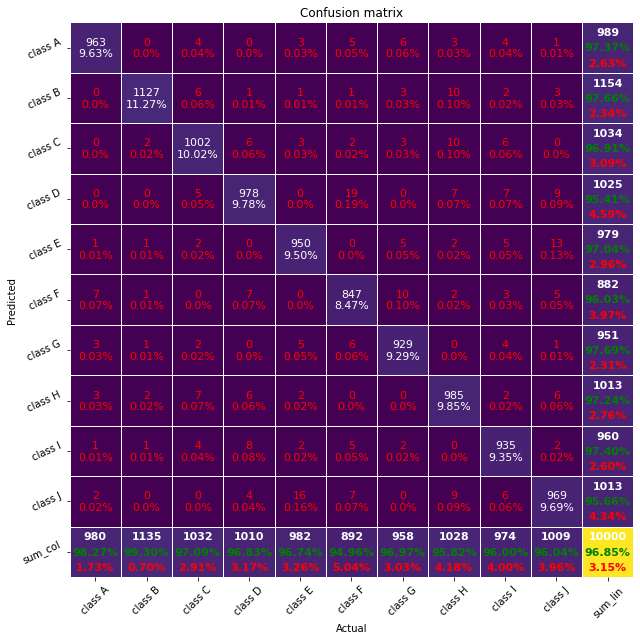

In [222]:
# ----------------------------------------------
# Test >>>
#

model.load_state_dict(torch.load("nnMnist_40h_20h.ph", map_location='cpu'))
model.eval() # Was macht eval? 
'''
Remember that you must call model.eval() to set dropout and batch normalization layers to evaluation mode before running inference.
Failing to do this will yield inconsistent inference results.
'''
y_pred = []
y_true = []

# clear old images
dir = 'failed/'
for f in os.listdir(dir):
    os.remove(os.path.join(dir, f))

for data, target in test_dl:
   data, target = data.to(device), target.to(device)
   output = model(data)
   pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
    
   y_pred.extend(pred.data.cpu().numpy())
   y_true.extend(target.data.cpu().numpy())

   counter = 0
   for i in range(len(y_pred)):
      if y_pred[i][0] != y_true[i]:
         data_to_image(data[i],counter,y_true[i])
         print(f"Pred/Target: {y_pred[i][0]} / {y_true[i]}")
         counter += 1

pp_matrix_from_data(y_true, y_pred, cmap='viridis')

In [217]:
## ----------------------------------------------
## Training >>>
##

# print('Starting training...')

# time0 = timer()

# epochs = 40

# arrPlotX = []
# train_losses, train_accuracies = [], []
# test_losses, test_accuracies = [], []
# for epoch in range(epochs):
#     train_epoch_losses, train_epoch_accuracies = [], []
#     for ix, batch in enumerate(iter(train_dl)):
#         x, y = batch
#         batch_loss = train_batch(x, y, model, optimizer, loss_fn)
#         train_epoch_losses.append(batch_loss)
#     train_epoch_loss = np.array(train_epoch_losses).mean()
#     for ix, batch in enumerate(iter(train_dl)):
#         x, y = batch
#         is_correct = accuracy(x, y, model)
#         train_epoch_accuracies.extend(is_correct)
#     train_epoch_accuracy = np.mean(train_epoch_accuracies)
#     for ix, batch in enumerate(iter(test_dl)):
#         x, y = batch
#         val_is_correct = accuracy(x, y, model)
#         validation_loss = loss(x, y, model)
#     val_epoch_accuracy = np.mean(val_is_correct)
#     arrPlotX.append(epoch)
#     train_losses.append(train_epoch_loss)
#     train_accuracies.append(train_epoch_accuracy)
#     test_losses.append(validation_loss)
#     test_accuracies.append(val_epoch_accuracy)
#     print( f"epoch: {epoch}  train_acc: {100 * train_epoch_accuracy:.2f}%  test_acc: {100 * val_epoch_accuracy:.2f}%" )
    

In [218]:
torch.save(model.state_dict(), "nnMnist_40h_20h.ph")

In [219]:
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy")

# plt.grid(color='black', linestyle='-', linewidth=0.5)
# plt.plot(arrPlotX, train_accuracies,"b",label='Training')
# plt.legend()
# plt.plot(arrPlotX, test_accuracies,"r", label='Testing')
# plt.legend()

# plt.savefig("accuracies.png")
